# Exploration of Yelp business REVIEW data

In another notebook we assigned businesses to one of the ten metro areas and screened out businesses that didn't seem to belong to any of those metros.  This now sits in a nice JSON file bus_metro2.json.

We need to check the review count and stars informatio makes sense and we understand it.

Questions to inform that are:

1) What range of counts and stars exist?

2) Are there fixed steps for stars?

3) Do review counts look usable?

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import json
import numpy as np
import pandas as pd

In [3]:
with open("bus_metro2.json", "rt") as infile:
    dfb = pd.read_json(infile)

In [4]:
dfb

,attributes,categories,city,full_address,hours,latitude,longitude,metro,name,neighborhoods,open,review_count,stars,state,type
--0ZoBTQWQra1FxD4rBWmg,{'Accepts Credit Cards': False},"[Property Management, Home Services, Real Estate]",Phoenix,"2920 E Camelback Rd\nSte100\nPhoenix, AZ 85016","{'Friday': {'open': '09:00', 'close': '17:00'}...",33.510773,-112.018737,Phoenix,Bourquin Residential Group,[],True,4,2.0,AZ,business
--1emggGHgoG6ipd_RMb-g,"{'Price Range': 1, 'Parking': {'valet': False,...","[Food, Convenience Stores]",Las Vegas,"3280 S Decatur Blvd\nWestside\nLas Vegas, NV 8...",{},36.130531,-115.207238,Las Vegas,Sinclair,[Westside],True,4,4.0,NV,business
--4Pe8BZ6gj57VFL5mUE8g,"{'Price Range': 3, 'Parking': {'valet': False,...","[Shopping, Office Equipment]",Phoenix,"21001 North Tatum Blvd. #24\nPhoenix, AZ 85050",{},33.676354,-111.973651,Phoenix,Office Max,[],True,9,3.0,AZ,business
--5jkZ3-nUPZxUvtcbr8Uw,"{'Parking': {'valet': False, 'lot': True, 'str...","[Greek, Vegetarian, Mediterranean, Restaurants]",Scottsdale,"1336 N Scottsdale Rd\nScottsdale, AZ 85257","{'Friday': {'open': '11:00', 'close': '21:00'}...",33.463373,-111.926908,Phoenix,Mika's Greek,[],True,127,4.5,AZ,business
--7PRjnsjMA6uhPK8mW13Q,{},"[Bars, Nightlife]",Pittsburgh,"3160 Library Rd\nPittsburgh, PA 15234",{},40.371878,-80.008930,Pittsburgh,Castle Tavern,[],True,3,2.5,PA,business
--AKjxBmhm9DWrh-e0hTOw,"{'Price Range': 2, 'Delivery': False, 'Good fo...","[Restaurants, Italian]",Laval,"993 Boulevard Saint-Martin Ouest\nLaval, QC H7...","{'Friday': {'open': '11:00', 'close': '23:00'}...",45.572509,-73.720293,Montreal,Grigio,[],True,6,4.5,QC,business
--BlvDO_RG2yElKu9XA1_g,"{'Parking': {'valet': False, 'lot': True, 'str...","[Sushi Bars, Hawaiian, Chinese, Restaurants]",Scottsdale,"14870 N Northsight Blvd\nSte 103\nScottsdale, ...","{'Friday': {'open': '10:30', 'close': '21:00'}...",33.621605,-111.899066,Phoenix,Asian Island,[],True,122,4.0,AZ,business
--Dl2rW_xO8GuYBomlg9zw,{'By Appointment Only': True},"[Medical Centers, Health & Medical]",Las Vegas,"4505 S Maryland Pkwy\nUniversity\nLas Vegas, N...",{},36.110940,-115.141514,Las Vegas,UNLV Student Health Center,[University],True,7,4.5,NV,business
--LzU4UT9rysIDXbhoWHiQ,"{'Price Range': 3, 'Parking': {'valet': False,...","[Hair Salons, Day Spas, Nail Salons, Beauty & ...",Pittsburgh,"99 S 10th St\nSouth Side\nPittsburgh, PA 15203","{'Friday': {'open': '10:00', 'close': '18:00'}...",40.427499,-79.988313,Pittsburgh,Lunasea Salon+Day Spa,[South Side],True,10,4.5,PA,business
--NCcmQqh_NZbjW1S5XsGQ,"{'Price Range': 2, 'Parking': {'valet': False,...","[Bakeries, Food, Desserts]",Montréal,"291 Beaudoin Street\nSud-Ouest\nMontréal, QC H...","{'Friday': {'open': '08:00', 'close': '18:00'}...",45.474274,-73.585614,Montreal,Sweet Lee's Rustic Bakery,[Sud-Ouest],False,5,4.5,QC,business


In [41]:
ids = dfb.index.tolist()
ids
dfb.loc['--Y_2lDOtVDioX5bwF6GIw']

attributes       {'Has TV': True, 'Happy Hour': True, 'Good for...
categories            [Bars, Comfort Food, Nightlife, Restaurants]
city                                                       Madison
full_address              115 State St\nCapitol\nMadison, WI 53703
hours            {'Friday': {'open': '11:00', 'close': '02:00'}...
latitude                                                   43.0747
longitude                                                 -89.3871
metro                                                      Madison
name                                                 Buck & Badger
neighborhoods                                            [Capitol]
open                                                          True
review_count                                                    62
stars                                                          2.5
state                                                           WI
type                                                      busi

In [46]:
dfb.index.value_counts().max()

1

### Start with Review counts

In [6]:
dfb.review_count.describe()

count    85893.000000
mean        34.342228
std        108.631631
min          3.000000
25%          5.000000
50%         10.000000
75%         26.000000
max       6200.000000
Name: review_count, dtype: float64

(0, 8000)

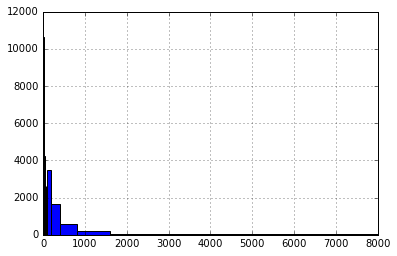

In [27]:
binvals = [0,1,2,3,4,5,6,7,8,9,10,15,20,25,30,40,50,60,80,100,200,400,800,1600,10000]
ax1 = dfb.review_count.hist(bins= binvals)
ax1.set_ylim([0,12000])
ax1.set_xlim([0,8000])

(0, 1000)

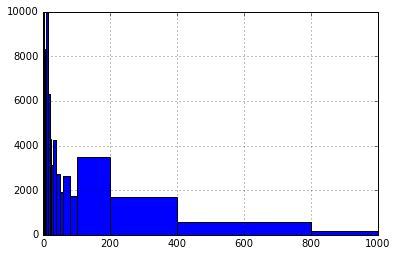

In [28]:
binvals = [0,1,2,3,4,5,6,7,8,9,10,15,20,25,30,40,50,60,80,100,200,400,800,1600,10000]
ax1 = dfb.review_count.hist(bins= binvals)
ax1.set_ylim([0,10000])
ax1.set_xlim([0,1000])

In [23]:
rvc = dfb.review_count.value_counts()
rvc

3       11318
4        8336
5        6544
6        5215
7        4274
8        3515
9        3091
10       2695
11       2364
12       2079
13       1831
14       1656
15       1503
16       1415
17       1253
18       1127
19       1023
20        978
21        921
22        835
23        819
24        738
25        705
26        680
27        618
28        576
29        553
30        523
32        496
31        495
        ...  
355         1
419         1
1566        1
1693        1
1368        1
3228        1
1432        1
665         1
793         1
1305        1
410         1
730         1
1498        1
1626        1
1818        1
827         1
2266        1
987         1
1243        1
3546        1
635         1
860         1
1180        1
571         1
507         1
541         1
669         1
733         1
925         1
1727        1
Name: review_count, dtype: int64

In [32]:
dfb[dfb.review_count > 6000]

,attributes,categories,city,full_address,hours,latitude,longitude,metro,name,neighborhoods,open,review_count,stars,state,type
4bEjOyTaDG24SY5TxsaUNQ,"{'Has TV': False, 'Open 24 Hours': False, 'Goo...","[Breakfast & Brunch, Steakhouses, French, Rest...",Las Vegas,"3655 Las Vegas Blvd S\nThe Strip\nLas Vegas, N...","{'Friday': {'open': '07:00', 'close': '00:00'}...",36.112952,-115.172589,Las Vegas,Mon Ami Gabi,[The Strip],True,6200,4.0,NV,business


In [29]:
dfb.stars.describe()

count    85893.000000
mean         3.694859
std          0.946031
min          1.000000
25%          3.000000
50%          4.000000
75%          4.500000
max          5.000000
Name: stars, dtype: float64

In [31]:
dfb.stars.value_counts()

4.0    17455
3.5    16622
4.5    13646
5.0    12963
3.0    11023
2.5     7446
2.0     3777
1.5     1889
1.0     1072
Name: stars, dtype: int64